In [23]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 첫 5행 출력
df.head()

,전출지별,전입지별,1970,1971,1972,...,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,...,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,...,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,...,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,...,351873,350213,351424,328228,321182


In [24]:
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,...,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,...,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,...,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,...,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,...,351873,350213,351424,328228,321182


In [25]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')
df_seoul

,1970,1971,1972,1973,1974,...,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,...,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,...,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,...,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,...,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,...,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,...,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,...,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,...,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,...,340801,332785,359337,370760,342433


In [27]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

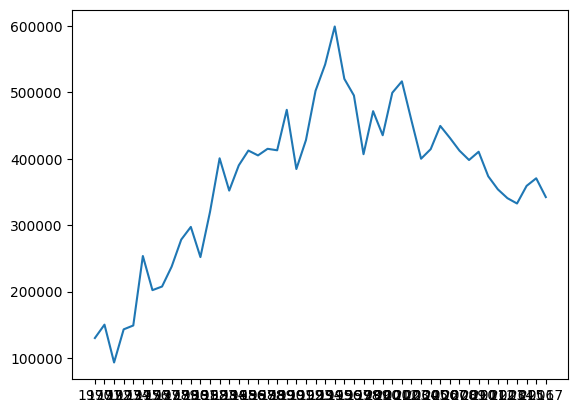

In [28]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

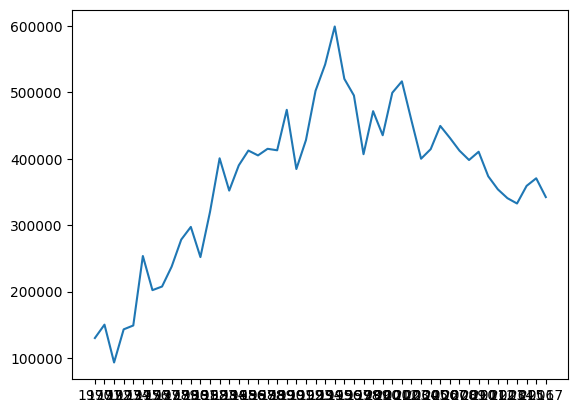

In [30]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)
plt.show()